# Probability & Statistics

Machine learning is all about describing things that will happen, or *might happen*. For instance, we might want to assess the likelihood of a user buying a book that the recommender system suggested. For this we need to use the language of probability and statistics. We give a very brief self-contained primer below. It is *not* meant as a substitute for a good statistics course ...

To understand why we care about probabilities, consider the problem of distinguishing cats and dogs. Simple, isn't it? In other words, we want to know, given an image, whether this is a picture of a cat or a dog.

| 20px | 40px | 80px | 160px | 320px |
|:----:|:----:|:----:|:-----:|:-----:|
|![](img/whitecat20.jpg)|![](img/whitecat40.jpg)|![](img/whitecat80.jpg)|![](img/whitecat160.jpg)|![](img/whitecat320.jpg)|
|![](img/whitedog20.jpg)|![](img/whitedog40.jpg)|![](img/whitedog80.jpg)|![](img/whitedog160.jpg)|![](img/whitedog320.jpg)|

While this is trivial at 320 pixel resolution, it becomes challenging at 40 pixels and next to impossible at 20 pixels. In other words, our ability of telling both apart at low resolution might be pretty close to chance level. A statistician might express this as $\Pr(\mathrm{cat}) = 0.6$. In the same way, our AI cat detector might not be quite so sure either. To make progress in building one, let's use some math. 

## Basic Probability Theory

Assume that we cast a dice and we would like to know our chances 
whether we wold see $1$ rather than another digit. If the dice is fair
all six outcomes $\mathcal{X} = \{1, \ldots, 6\}$ are equally likely to
occur, hence we would see a $1$ in $1$ out of $6$ cases. Formally
we state that $1$ occurs with probability $\frac{1}{6}$. 

For a real dice that we receive from a factory we might not know those
proportions and we would need to check whether it is tainted. The only
way to investigate the dice is by casting it many times and recording
the outcomes. As we do so we will observe a certain number of values
$\{1, 2, \ldots, 6\}$ occurring. A natural choice would be to use the
individual counts divided by the total number of tosses as an
*estimate* of the probability of a given event. The law of large
numbers tell us that indeed this is what will happen in the limit. 
Before going into the details of what's going here, let's try it out.

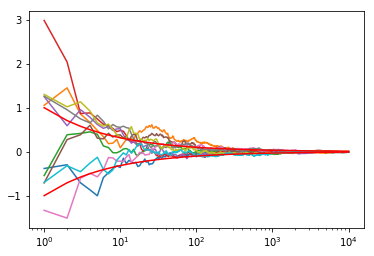

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

# generate 10 random sequences of 10,000 random normal variables N(0,1)
x = random.normal(size=(10000,10))
# cumulative sum and normalization
y = np.arange(1,10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

for i in range(10):
    plt.semilogx(y,z[:,i])

plt.semilogx(y,np.power(y,-0.5),'r')
plt.semilogx(y,-np.power(y,-0.5),'r')
plt.show()   

What we can see is that the red curve pretty well captures the behavior of the 10 random traces of averages. This is the case since we are averaging numbers and their aggregate behavior is like that of a number with a lot less uncertainty. Looking at the red curves, they are given by $f(x) = 1/\sqrt{x}$. What we just introduced is the notion of a **random variable**. A random variable, say $X$ can be pretty much anything that doesn't (necessarily) assume a deterministic value. For instance $X \in \{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit}\}$ if we want to look at different animals that we might encounter, or maybe $X \in \{1, 2, ... 6\}$ when we are dealing with a dice. Or $X$ could denote the height of a car passing us, etc.

Note that there is a subtle difference between discrete random variables, like the sides of a dice, and continuous ones, like the weight and the height of a person. There's little point in asking whether two people have exactly the same height - the probably won't. In fact, even the same person will probably not have the same height at two different occasions. They might have gained weight, a tiny bit of skin on their feet might have rubbed off, etc; What makes more sense in this case is to ask whether the height falls into a given interval, say between 180.0 and 180.1 centimeters. In such cases we will typically refer to densities as a way of quantifying how likely it is that we will see a value. 

More formally (but still quite sloppy by most mathematician's standards), we posit the following for probabilities:

* For any event $Z$, the probability is never negative, i.e. $\Pr(Z) \geq 0$.
* For any two events $Z$ and $Z'$ the union is no more likely than the sum of the individual events, i.e. $\Pr(Z \cup Z') \leq \Pr(Z) + \Pr(Z')$.
* For the empty set $\emptyset$ we have $\Pr(\emptyset) = 0$ and moreover for the universe $\Omega$ we have $\Pr(\Omega) = 1$.
* For any disjoint set of events $Z \cap Z' = \emptyset$ we have $\Pr(Z \cup Z') = \Pr(Z) + \Pr(Z')$.

To deal with densities, we can use integrals, i.e.
$\Pr(Z) = \int_{z \in Z} p(z) dz$. In particular, for one-dimensional problems, we use $\Pr([a,b]) = \int_a^b p(z) dz$.

## More than one random variable

In most interesting cases we will need to deal with more than one random variable at a time. For instance, images contain millions of pixels, thus millions of random variables. And in many cases images will come with metadata, such as location, time, aperture, focal length, ISO, focus distance, camera type, etc.; All of these are random variable that occur jointly. To deal with multiple random variables, we simply write out $\Pr(A, B)$. It is clear that $\Pr(A,B) \leq \Pr(A)$ and $\Pr(A,B) \leq \Pr(B)$. This has to be the case, since for $A$ and $B$ to happen, $A$ has to happen *and then* $B$ also has to happen (and vice versa). Thus it cannot be more likely than $A$ or $B$ respectively. This brings us to an interesting ratio: $0 \leq \frac{\Pr(A,B)}{\Pr(A)} \leq 1$. We will call this a **conditional probability** and denote it by $\Pr(B|A)$, the probability that $B$ happens, provided that $A$ has happened. 

This allows us to derive one of the most useful and celebrated equations in statistics - Bayes' theorem. It goes as follows. By construction we have that $\Pr(A, B) = \Pr(B|A) \Pr(A)$. By symmetry this also holds for $\Pr(A,B) = \Pr(A|B) \Pr(B)$. Solving this for one of the conditional variables we get:

$$\Pr(A|B) = \frac{\Pr(B|A) \Pr(A)}{\Pr(B)}$$

This is very useful if we want to infer one thing from another, say cause and effect but we only know the properties in the reverse direction. One important operation that we need to make this work is **marginalization**, i.e. the operation of determining $\Pr(A)$ and $\Pr(B)$ from $\Pr(A,B)$. We can see that the probability of seeing $A$ amounts to accounting for all possible choices of $B$ and aggregating the joint probabilities over all of them, i.e. 

$$\Pr(A) = \sum_{B'} \Pr(A,B') \text{ and } \Pr(B) = \sum_{A'} \Pr(A',B)$$

A really useful property to check is for **dependence** and **independence**. Independence is when the occurrence of one event does not influence the occurrence of the other. In this case $\Pr(B|A) = \Pr(B)$. Statisticians typically use $A \perp\!\!\!\perp B$ to express this. From Bayes Theorem it follows immediately that also $\Pr(A|B) = \Pr(A)$. In all other cases we call $A$ and $B$ dependent. For instance, two successive rolls of a dice are independent. On the other hand, the position of a light switch and the brightness in the room are not (they are not perfectly deterministic, though, since we could always have a broken lightbulb, power failure, or a broken switch). 

Let's put our skills to the test. Assume that a doctor administers an AIDS test to a patient. This test is fairly accurate and fails only with 1% probability if the patient is healthy by reporting him as diseased, and that it never fails to detect HIV if the patient actually has it. We use $D$ to indicate the diagnosis and $H$ to denote the HIV status. Written as a table the outcome $\Pr(D|H)$ looks as follows:

|             | Patient is HIV positive | Patient is HIV negative |
|:------------|------------------------:|------------------------:|
|Test positive| 1 | 0.01 |
|Test negative| 0 | 0.99 |

Note that the column sums are all one (but the row sums aren't), since the conditional probability needs to sum up to $1$, just like the probability. Let us work out the probability of the patient having AIDS if the test comes back positive. Obviously this is going to depend on how common the disease is, since it affects the number of false alarms.
Assume that the population is quite healthy, e.g. $\Pr(\text{HIV positive}) = 0.0015$. To apply Bayes Theorem we need to determine 

$$\Pr(\text{Test positive}) = \Pr(D=1|A=0) \Pr(A=0) + \Pr(D=1|A=1) \Pr(A=1) = 0.01 \cdot 0.9985 + 1 \cdot 0.0015 = 0.011485$$

Hence we get $\Pr(A = 1|D = 1) = \frac{\Pr(D=1|A=1) \Pr(A=1)}{\Pr(D=1)} = \frac{1 \cdot 0.0015}{0.011485} = 0.131$, in other words, there's only a 13.1% chance that the patient actually has AIDS, despite using a test that is 99% accurate! As we can see, statistics can be quite counterintuitive. 

## Conditional Independence

What is our poor patient to do when he receives such terrifying news? Quite surely he will ask the physician to administer another test to get clarity. The second test has somewhat different characteristics (it isn't as good as the first one). 

|             | Patient is HIV positive | Patient is HIV negative |
|:------------|------------------------:|------------------------:|
|Test positive| 0.98 | 0.03 |
|Test negative| 0.02 | 0.97 |

Unfortunately the second test comes back positive, too. Let us work out the requisite probabilities to invoke Bayes' Theorem. 

* $\Pr(D_1 = 1 \text{ and } D_2 = 1|A = 0) = 0.01 \cdot 0.03 = 0.0001$
* $\Pr(D_1 = 1 \text{ and } D_2 = 1|A = 1) = 1 \cdot 0.98 = 0.98$
* $\Pr(D_1 = 1 \text{ and } D_2 = 1) = 0.0001 \cdot 0.9985 + 0.98 \cdot 0.0015 = 0.00156985$
* $\Pr(A = 1|D_1 = 1 \text{ and } D_2 = 1) = \frac{0.98 \cdot 0.0015}{0.00156985} = 0.936$

That is, the second test allowed us to gain much higher confidence that not all is well. Despite the second test being considerably less accurate than the first one, it still improved our estimate quite a bit. *Why couldn't we just run the first test a second time?* After all, the first test was more accurate. The reason is that we needed a second test that confirmed *independently* of the first test that things were dire, indeed. In other words, we made the tacit assumption that $\Pr(D_1, D_2|A) = \Pr(D_1|A) \Pr(D_2|A)$. Statisticians call such random variables **conditionally independent**. This is expressed as $D_1 \perp\!\!\!\perp D_2 | A$. 

Conditional independence is really useful when dealing with data, since it simplifies a lot of equations. A popular algorithm is the Naive Bayes Classifier. The key assumption in it is that the attributes are all independent of each other, given the labels. In other words, we have:

$$p(x|y) = \prod_i p(x_i|y)$$

Using Bayes Theorem this leads to the classifier $p(y|x) = \frac{\prod_i p(x_i|y) p(y)}{p(x)}$. Unfortunately, this is still intractable, since we don't know $p(x)$. Fortunately, we don't need it, since we know that $\sum_y p(y|x) = 1$, hence we can always recover the normalization from $p(y|x) \propto \prod_i p(x_i|y) p(y)$. After all that math, it's time for some code to show how to use a Naive Bayes classifier for distinguishing 0 from 1 on the MNIST digit classification dataset.

In [4]:
import mxnet as mx
import mxnet.ndarray as nd

mnist = mx.test_utils.get_mnist()
batch_size = 1 
# we go over one observation at a time (speed doesn't matter here)
train_data = mx.io.NDArrayIter(mnist["train_data"], mnist["train_label"], batch_size, shuffle=True)
test_data = mx.io.NDArrayIter(mnist["test_data"], mnist["test_label"], batch_size, shuffle=True)

# initialize the count statistics for p(y) and p(x_i|y)
ycount = nd.zeros(shape=(2))
xcount = nd.zeros(shape=(784,2))

for batch in train_data:
    x = batch.data[0].reshape((784,))
    y = batch.label[0]
    if label.asscalar() == 0:
        ycount[0] += 1
        xcount[:,0] += data
    if label.asscalar() == 1:
        ycount[1] += 1
        xcount[:,1] += data

MXNetError: [10:16:06] src/operator/tensor/./elemwise_binary_broadcast_op.h:48: Check failed: l == 1 || r == 1 operands could not be broadcast together with shapes (2,) (784,)

Stack trace returned 2 entries:
[bt] (0) 0   libmxnet.so                         0x0000000112d833d9 _ZN4dmlc15LogMessageFatalD1Ev + 41
[bt] (1) 1   libstdc++.6.dylib                   0x000000011484cfc0 _ZTVNSt7__cxx1115basic_stringbufIcSt11char_traitsIcESaIcEEE + 16


print(xcount[:,0])
print(data)
xcount[:,0] = data

## Random numbers

## Sampling

## The uniform distribution

## The normal distribution

## The categorical distribution

## The multinomial distribution